In [ ]:
# Fetching property data via Domain API

In [160]:
# Import libraries and dependencies
import os
import pandas as pd
import requests
from pathlib import Path
import json
import numpy as np
import hvplot.pandas
import panel as pn
import plotly.express as px
import random

In [43]:
# Load .env enviroment variables
from dotenv import load_dotenv, find_dotenv
load_dotenv()

True

In [44]:
# Set Domain API key "	api_locations_read"
domain_key = os.getenv("Domain_API")
client_id = os.getenv("Client_Id")
client_secret = os.getenv("Secret_Value")
type(client_secret)

str

In [54]:
auth_url = "https://auth.domain.com.au/v1/connect/token"

In [127]:
response = requests.post(auth_url,
        data = {
        'client_id':client_id,
        'client_secret':client_secret,
        'grant_type':'client_credentials',
        'scope':"api_salesresults_read",
        'Content-Type':'text/json'}
        )
json_res = response.json()
access_token=json_res["access_token"]
auth = {'Authorization':'Bearer '+access_token}

#fetching data for different cities via API
cities = ["Sydney","Melbourne","Brisbane", "Canberra", "Adelaide"]
df_combined=[]

for City in cities:
    url_detailed=f'https://api.domain.com.au/v1/salesResults/{City}'
    resp = requests.get(url_detailed, headers = auth)
    resp = resp.json()
    df = pd.DataFrame(resp,index=[0]).T
    df.columns=[City]
    df_combined.append(df)

df_combined = pd.concat(df_combined,axis=1)

#Transposing df_combined 
df_combined = df_combined.transpose()

# Dropping avoidable Columns
df_combined = df_combined.drop('auctionedDate', axis=1)
df_combined = df_combined.drop('lastModifiedDateTime', axis=1)

df_combined.head(10)

,numberListedForAuction,numberWithdrawn,numberUnreported,numberAuctioned,numberSold,totalSales,median,adjClearanceRate
Sydney,785,77,9,561,437,504968750.0,1540000,0.778966
Melbourne,890,58,4,650,455,388426256.0,990000,0.7
Brisbane,103,2,2,50,43,37845500.0,1201000,0.86
Canberra,83,0,0,59,49,44362750.0,1036000,0.830508
Adelaide,120,4,2,73,58,39600388.0,940000,0.794521


In [64]:
# # saving the combined dataframe as CSV due to API limitations
# df_combined.to_csv("cities_combined.csv")

# # reading from CSV file
# file_path = Path("cities_combined.csv")
# df_imported = pd.DataFrame(pd.read_csv(file_path))
# df_imported = df_imported.rename(columns={"Unnamed: 0": "City"})
# df_imported.head(10)

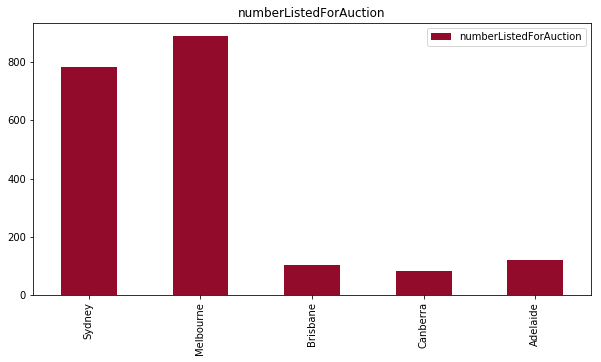

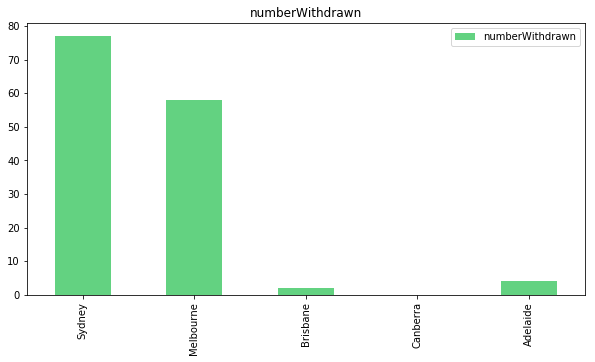

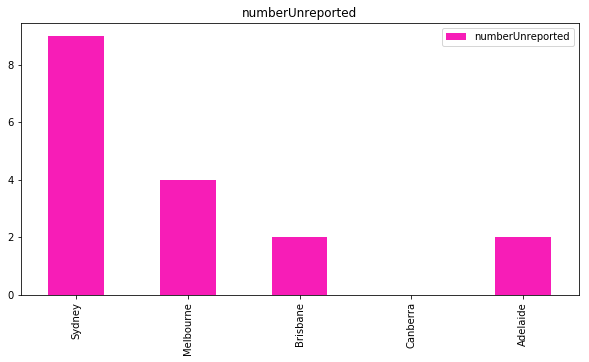

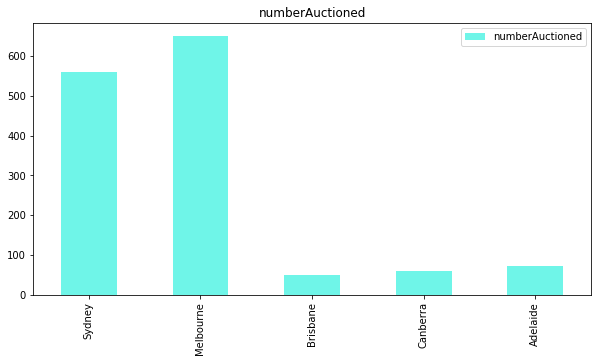

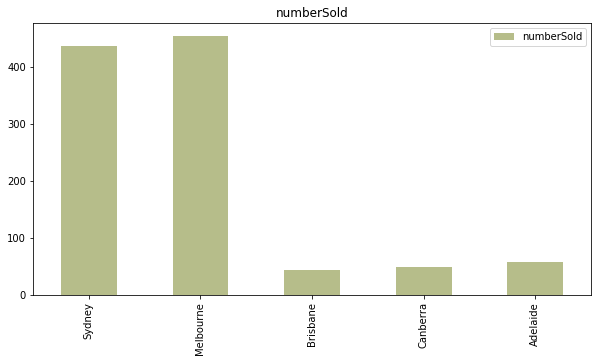

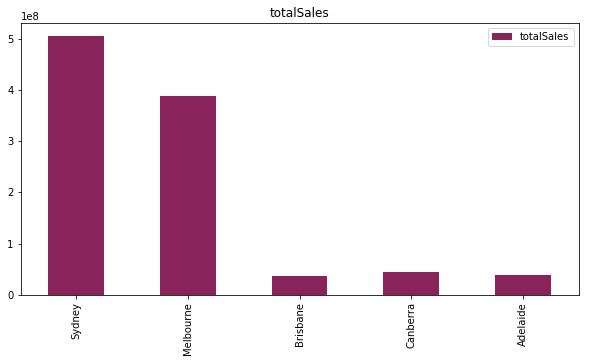

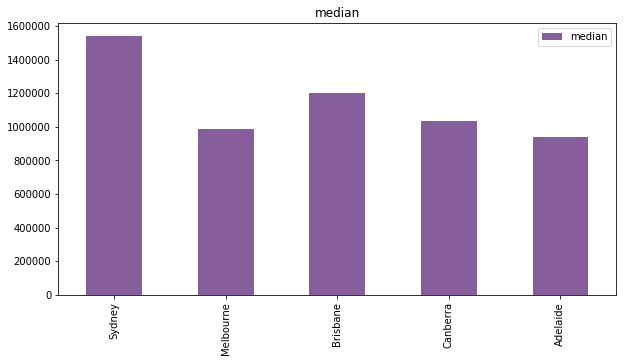

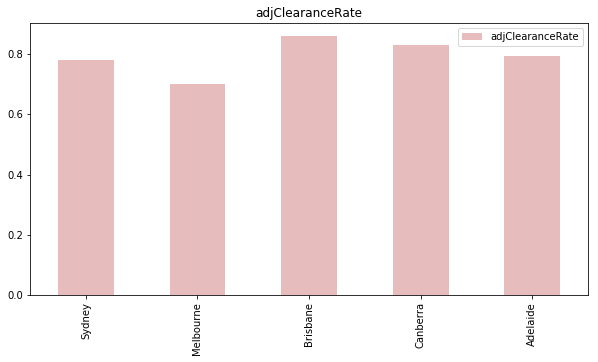

In [158]:
#creating bar plot using df_combined dataframe

for col in df_combined.columns:
        colors = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]        
        df_combined[[col]].plot.bar(title=col, color=colors, figsize=(10,5))        

In [124]:
#creating_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):    
    create_line_chart = data.hvplot.line(title=title, xlabel=xlabel, ylabel=ylabel, color=color, height=400)
    return (create_line_chart)

In [172]:
#creating a Line chart for median price per city using df_combined dataframe
median_line_chart = create_line_chart(df_combined["median"],"Average Sale Price Per City",
                            "City", "Avarage Price (AUD)", "red").opts(yformatter="%.0f")

#creating a bar chart for total number of sales per city using df_combined dataframe
#sales_bar_chart = df_combined["totalSales"].hvplot.bar(label = 'Number of Property Sold Per City').opts(yformatter="%.0f")
                                         
sales_line_chart = create_line_chart(df_combined["totalSales"],"Number of Property Sold Per City",
                            "City", "Number of Sales", "orange").opts(yformatter="%.0f")

sales_line_chart + median_line_chart

:Layout
   .Curve.TotalSales :Curve   [index]   (totalSales)
   .Curve.Median     :Curve   [index]   (median)

In [219]:
# reading from CSV file for sunburst chart
file_path = Path("cities_combined.csv")
df_imported = pd.DataFrame(pd.read_csv(file_path))
df_imported = df_imported.rename(columns={"Unnamed: 0": "City"})
df_imported = df_imported.set_index(df_imported["City"])
df_imported.head(10)

,City,numberListedForAuction,numberWithdrawn,numberUnreported,numberAuctioned,numberSold,totalSales,median,adjClearanceRate
City,,,,,,,,,
Sydney,Sydney,785,77,9,561,437,504968750,1540000,0.778966
Melbourne,Melbourne,890,58,4,650,455,388426256,990000,0.700000
Brisbane,Brisbane,103,2,2,50,43,37845500,1201000,0.860000
Canberra,Canberra,83,0,0,59,49,44362750,1036000,0.830508
Adelaide,Adelaide,120,4,2,73,58,39600388,940000,0.794521


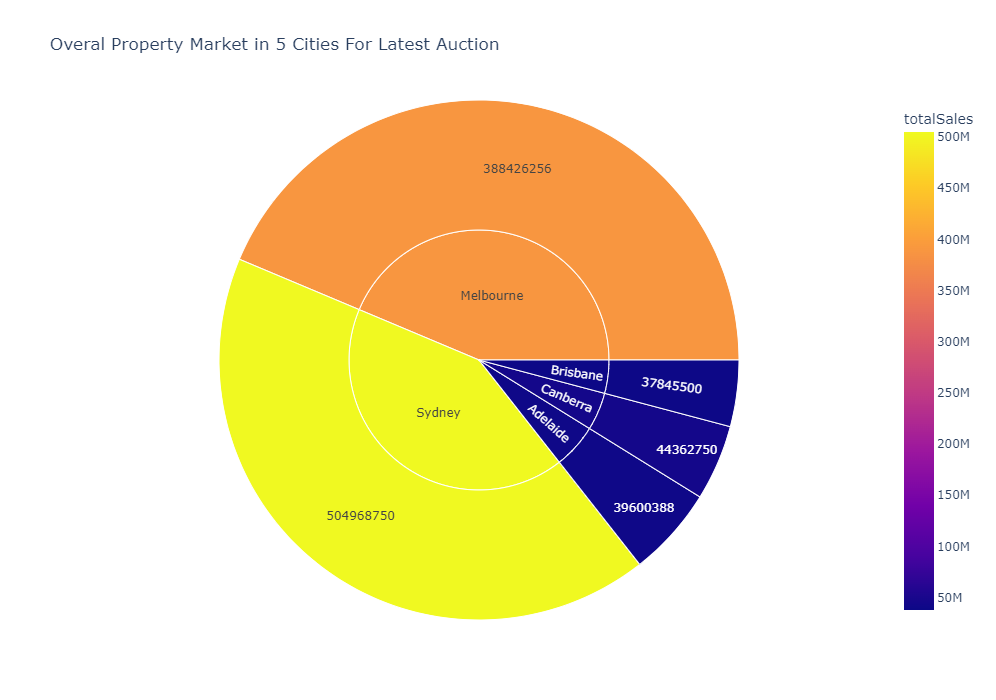

In [220]:
# Create the sunburst chart using df_combined
sunburst_chart = px.sunburst(
    df_imported,
    path=['City','totalSales'],
    values="numberSold",
    color='totalSales',
    title="Overal Property Market in 5 Cities For Latest Auction ",
    height=700
)
sunburst_chart.show()